<a href="https://colab.research.google.com/github/Anshad-Aziz/Machine_Learning/blob/main/DISEASE_CLASSIFICATION_USING_SYMPTOMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import os


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [18]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
data=pd.read_csv('Symptom2Disease.csv')

In [20]:
data.head()

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."


In [21]:
data.drop(columns=["Unnamed: 0"],inplace=True)

In [22]:
data.head()

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1200 non-null   object
 1   text    1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB


In [24]:
data.isnull().sum()

label    0
text     0
dtype: int64

In [25]:
data.columns

Index(['label', 'text'], dtype='object')

In [26]:
data.value_counts()

label                    text                                                                                                                                                                                                                                                
Jaundice                 I've been feeling extremely scratchy, sick, and worn out. In addition, I've lost weight and have a temperature. My urine is dark, and my skin has turned yellow. Additionally, I have been experiencing stomach pain.                                   4
Dimorphic Hemorrhoids    I've been constipated and it's really hard to go to the bathroom. When I do go, it hurts and my stool has been bloody. I've also been having some pain in my butt and my anus has been really itchy and irritated.                                      3
Arthritis                I've been feeling really weak in my muscles and my neck has been really stiff. My joints have been swelling up and it's hard for me to move around without 

In [27]:
labels=data['label']
symptoms=data['text']

In [28]:
stop_words=set(stopwords.words('english'))

In [32]:
# Text Preprocessing Function

def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text.lower())
    # Removing stopwords and non-alphabetic characters
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

In [33]:
preprocessed_symptoms=symptoms.apply(preprocess_text)

In [36]:
# Generate Word Cloud for symptoms
all_text = ' '.join(preprocessed_symptoms)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

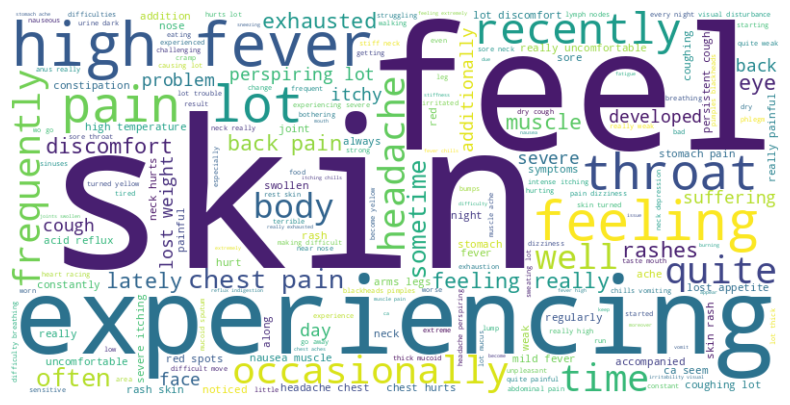

In [37]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

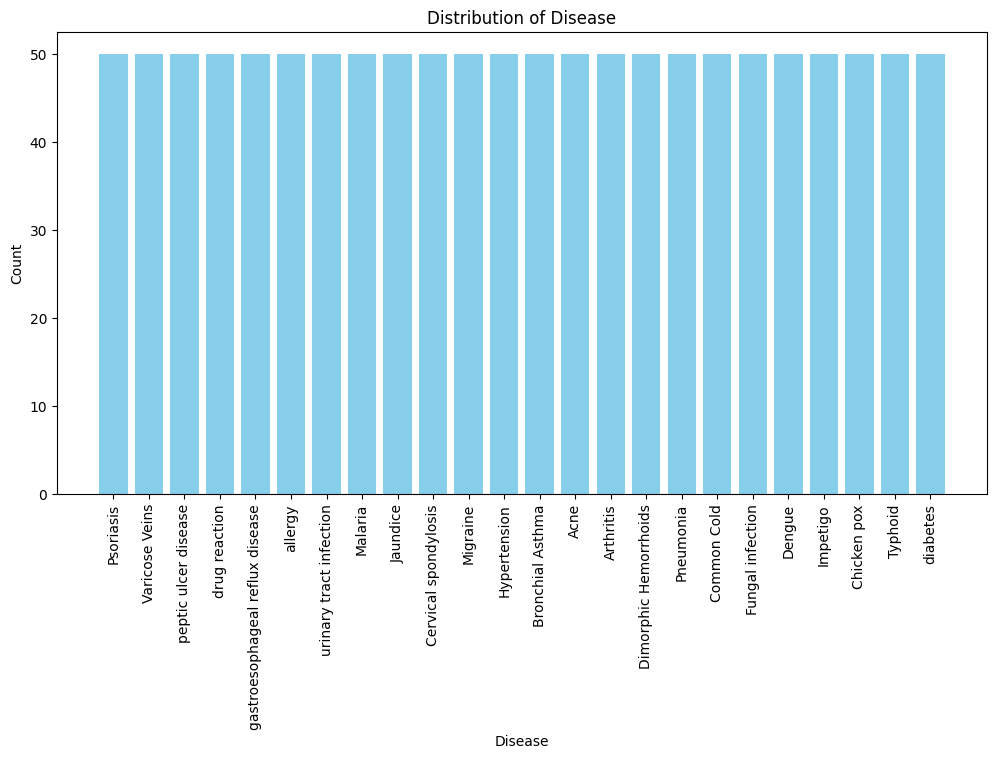

In [38]:
disease_counts=data['label'].value_counts()

plt.figure(figsize=(12,6))
plt.bar(disease_counts.index,disease_counts.values,color='skyblue')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Distribution of Disease')
plt.xticks(rotation=90)
plt.show()

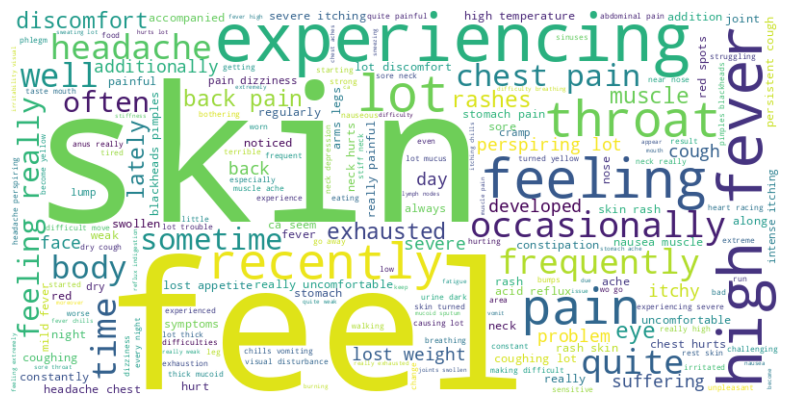

In [39]:
from wordcloud import WordCloud

# Combine all symptoms into a single string
all_text = ' '.join(preprocessed_symptoms)

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
tfidf_vectorizer=TfidfVectorizer(max_features=1500)
tfidf_features=tfidf_vectorizer.fit_transform(preprocessed_symptoms).toarray()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, labels, test_size=0.2, random_state=42)

In [44]:
knn_classifier=KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [45]:
predictions=knn_classifier.predict(X_test)

In [46]:
accuracy=accuracy_score(y_test,predictions)
print(f'Accuracy:{accuracy}:.2f')
print(classification_report(y_test,predictions))

Accuracy:0.9541666666666667:.2f
                                 precision    recall  f1-score   support

                           Acne       0.88      1.00      0.93         7
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       0.85      1.00      0.92        11
           Cervical spondylosis       1.00      1.00      1.00         7
                    Chicken pox       0.80      1.00      0.89        12
                    Common Cold       1.00      0.83      0.91        12
                         Dengue       0.92      0.92      0.92        12
          Dimorphic Hemorrhoids       1.00      1.00      1.00         7
               Fungal infection       1.00      1.00      1.00        13
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       1.00      1.00      1.00        11
                       Jaundice       1.00      1.00      1.00        11
                  

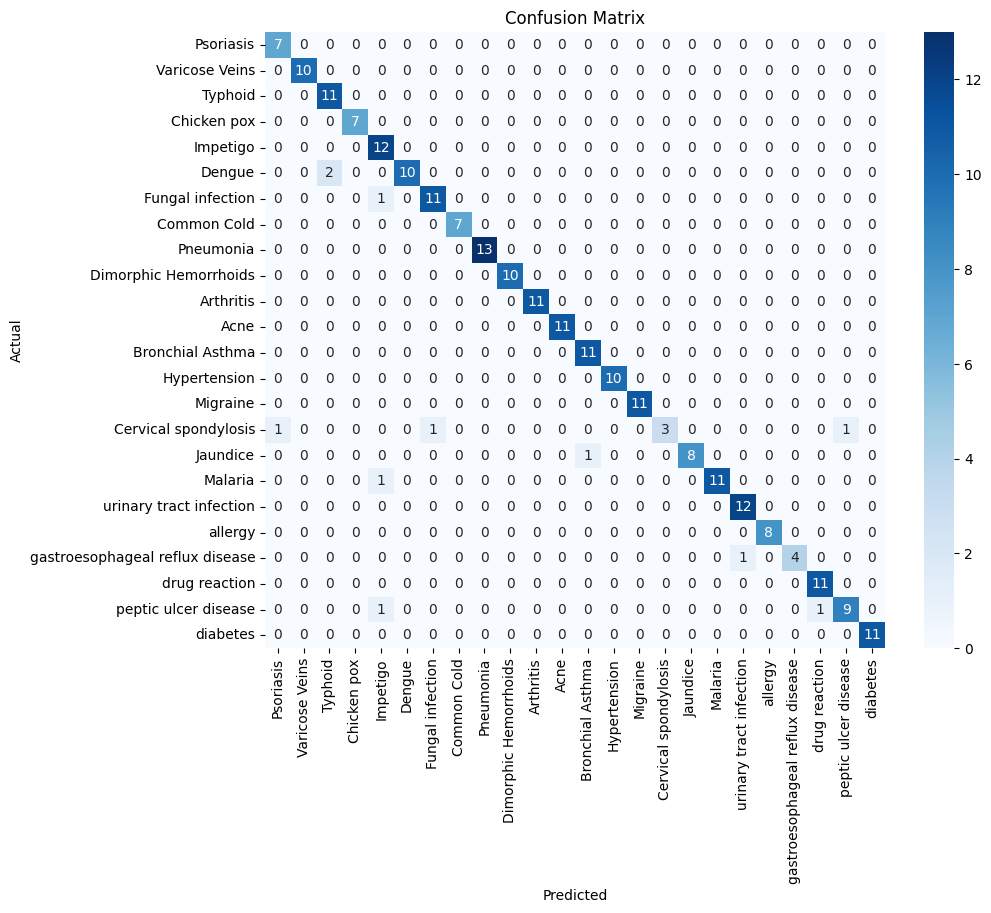

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix=confusion_matrix(y_test,predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels.unique(), yticklabels=labels.unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [50]:
symptom="I regularly experience these intense urges"
preprocessed_symptoms=preprocess_text(symptom)
symptom_tfidf=tfidf_vectorizer.transform([preprocessed_symptoms])

predicted_disease=knn_classifier.predict(symptom_tfidf)
print(f'Predicted Disease:{predicted_disease[0]}')

Predicted Disease:diabetes


In [57]:
import pickle

In [58]:
with open('knn_classifier.pkl', 'wb') as model_file:
    pickle.dump(knn_classifier, model_file)